In [1]:
# correlate effects 

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
base_path = os.path.dirname(os.getcwd())

ami = pd.read_csv(base_path + '/data/jessen/jessen_effectsize.csv')
ola = pd.read_csv(base_path + '/data/STOPPD/parcelwise_withingroup.csv')
clz = pd.read_csv(base_path + '/data/CLZ44/stats/parcelwise_effectsize.csv')
flu = pd.read_csv(base_path + '/data//Flupentixol/Flupentixol_parcelwise.csv')
ris = pd.read_csv(base_path + '/data/Risperidone/Risperidone_parcelwise.csv')

enigma_data = pd.read_csv(base_path + '/data/ENIGMA/ENIGMA_S32_partial_correlation_between_cortical_thickness_and_chlorpromazine_equivalents.csv')
enigma_data = enigma_data[:-2]

In [3]:
# sanity check that all regions are in the same order
regions = pd.DataFrame({'ola': ola['parcel'], 'clz': clz['parcel'], 'ami':ami['parcel'], 
                        'flu':flu['parcel'],'ris':ris['parcel'], 'ENIGMA': enigma_data['region']})
regions

,ola,clz,ami,flu,ris,ENIGMA
0,lh_bankssts_thickness,lh_bankssts_thickness,L_bankssts,lh_bankssts,lh_bankssts,Left banks of superior temporal sulcus
1,lh_caudalanteriorcingulate_thickness,lh_caudalanteriorcingulate_thickness,L_caudalanteriorcingulate,lh_caudalanteriorcingulate,lh_caudalanteriorcingulate,Left caudal anterior cingulate cortex
2,lh_caudalmiddlefrontal_thickness,lh_caudalmiddlefrontal_thickness,L_caudalmiddlefrontal,lh_caudalmiddlefrontal,lh_caudalmiddlefrontal,Left caudal middle frontal gyrus
3,lh_cuneus_thickness,lh_cuneus_thickness,L_cuneus,lh_cuneus,lh_cuneus,Left cuneus
4,lh_entorhinal_thickness,lh_entorhinal_thickness,L_entorhinal,lh_entorhinal,lh_entorhinal,Left entorhinal cortex
...,...,...,...,...,...,...
63,rh_supramarginal_thickness,rh_supramarginal_thickness,R_supramarginal,rh_supramarginal,rh_supramarginal,Right supramarginal gyrus
64,rh_frontalpole_thickness,rh_frontalpole_thickness,R_frontalpole,rh_frontalpole,rh_frontalpole,Right frontal pole
65,rh_temporalpole_thickness,rh_temporalpole_thickness,R_temporalpole,rh_temporalpole,rh_temporalpole,Right temporal pole
66,rh_transversetemporal_thickness,rh_transversetemporal_thickness,R_transversetemporal,rh_transversetemporal,rh_transversetemporal,Right transverse temporal gyrus


In [4]:
df = pd.DataFrame({'parcel':ola['parcel'], 'Enigma':enigma_data['partial_r'], 
                   'Olanzapine':ola['hedges_g'], 'Clozapine':clz['hedges_g'], 
                   'Amisulpiride':ami['hedges_g'],'Flupentixol':flu['hedges_g'],
                  'Risperidone': ris['hedges_g']})



In [5]:
df['Olanzapine'] = df['Olanzapine']*7
df

,parcel,Enigma,Olanzapine,Clozapine,Amisulpiride,Flupentixol,Risperidone
0,lh_bankssts_thickness,-0.063,-0.012017,-0.276455,-0.125984,-0.216888,0.240254
1,lh_caudalanteriorcingulate_thickness,-0.009,-0.015928,-0.253661,0.114066,0.057254,0.371294
2,lh_caudalmiddlefrontal_thickness,-0.102,-0.017095,-0.387996,-0.095143,-0.343017,-0.015763
3,lh_cuneus_thickness,-0.031,-0.004579,-0.084386,-0.055707,-0.137207,0.121111
4,lh_entorhinal_thickness,-0.041,-0.011792,-0.118459,0.166447,-0.119054,0.401320
...,...,...,...,...,...,...,...
63,rh_supramarginal_thickness,-0.094,-0.014201,-0.264987,0.075390,-0.296176,0.317512
64,rh_frontalpole_thickness,-0.043,-0.008962,-0.240045,0.026537,-0.246507,0.241015
65,rh_temporalpole_thickness,-0.061,-0.012810,-0.324148,-0.221446,-0.012096,0.359738
66,rh_transversetemporal_thickness,-0.040,-0.019441,-0.183635,-0.074646,-0.222154,0.461925


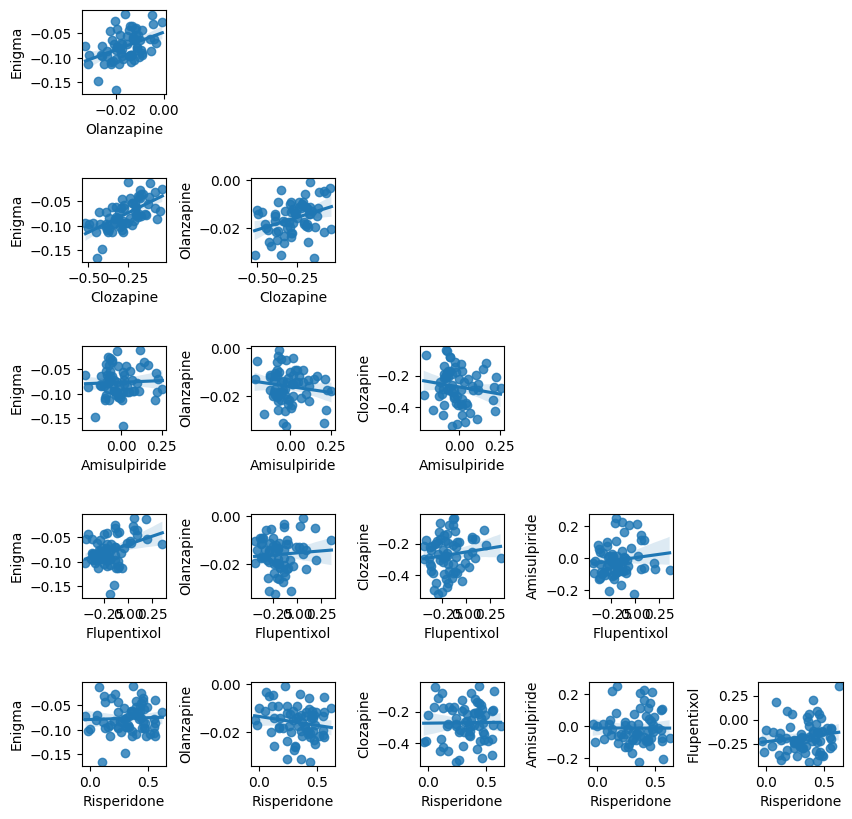

In [6]:
fig, ax = plt.subplots(6,6, figsize=(12,12))
plt.subplots_adjust(wspace=1, hspace=1)

for i, col in enumerate(df.columns[1:]):
    for j, row in enumerate(df.columns[1:]):       
        d=sns.regplot(df, x=col, y=row, ax=ax[i,j])
        #tcs = np.round(d.get_xticks(),2)
        #d.set_xticks(tcs[1::2])
        if i <= j:
            ax[i, j].set_visible(False)
            continue


fname = f'{base_path}/figs/all_scatter.jpg'
#plt.savefig(fname, dpi=300, bbox_inches='tight')


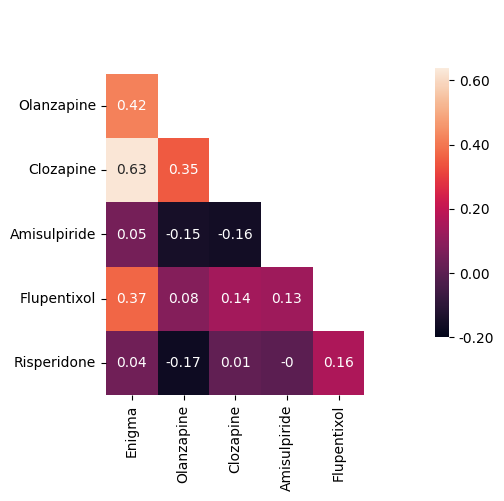

In [29]:
corr= np.round(df.loc[:,'Enigma':'Risperidone'].corr(),2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(5,5))
h= sns.heatmap(corr, annot=True, mask=mask,vmax=0.64, vmin=-0.2, 
               cbar_kws={"shrink": .7,
                         "ticks": [-0.2, 0, 0.2, 0.4, 0.6],        # locations
                         "format": "%.2f"})
ax.set_yticks([1.5, 2.5, 3.5, 4.5, 5.5]);
ax.set_xticks([0.5,1.5, 2.5, 3.5, 4.5]);

PearsonRResult(statistic=-0.17181632763598878, pvalue=0.16121143483992084)


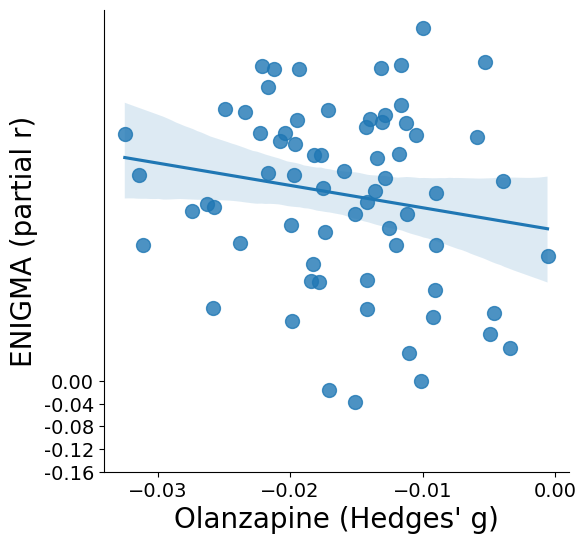

In [17]:
fig  = plt.figure(figsize=(6,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
sns.regplot(df, x='Olanzapine', y='Risperidone', scatter_kws={'s': 100});

fontdict = {'size':20}
plt.xlabel("Olanzapine (Hedges' g)", fontdict=fontdict)
plt.ylabel("ENIGMA (partial r)", fontdict=fontdict)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(ticks=[-0.16, -0.12,  -0.08 ,-0.04, 0.00 ], labels=["-0.16",  "-0.12","-0.08",  "-0.04", "0.00" ]);

print(pearsonr(ola['hedges_g'],ris['hedges_g]))

AttributeError: 'numpy.ndarray' object has no attribute 'xticks'

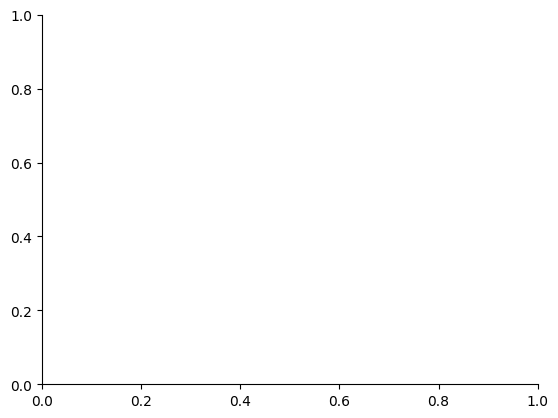

In [23]:
plt.xticks()[0]
ax.xticks()

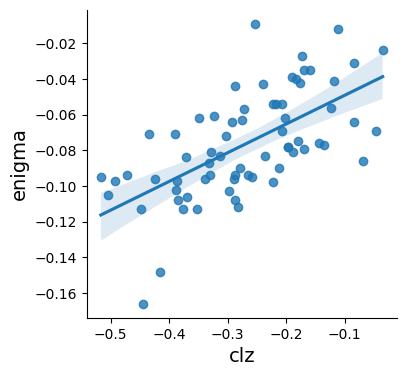

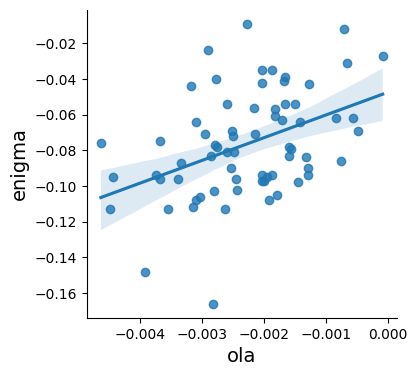

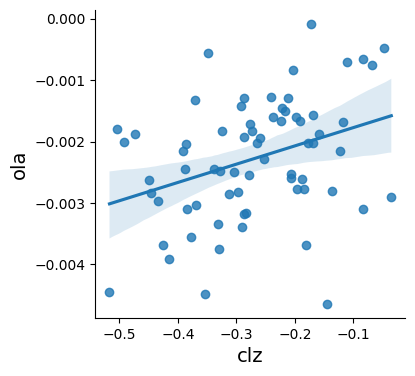

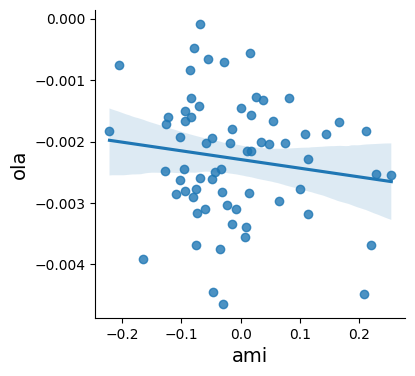

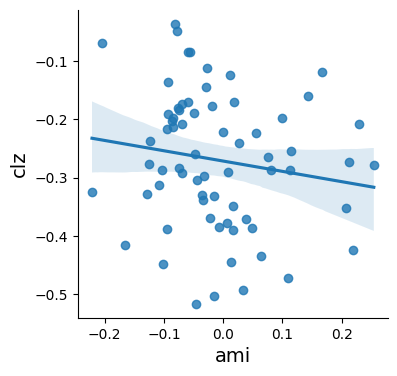

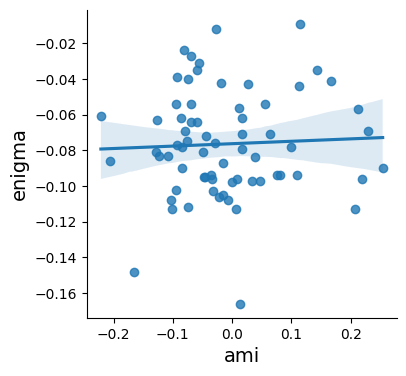

In [27]:
pairs = [('clz', 'enigma'), ('ola', 'enigma'), ('clz', 'ola'), ('ami','ola'), ('ami', 'clz'), ('ami','enigma')]

for p in pairs:
    fig, ax = plt.subplots(figsize=(4,4))
    sns.despine()
    sns.regplot(df, x=p[0], y=p[1])
    ax.set_xlabel(p[0], size=14)
    ax.set_ylabel(p[1], size=14)
    r,_ = pearsonr(df[p[0]],df[p[1]])
    fname = f'{base_path}/figs/{p[0]}_{p[1]}_scatter.jpg'
    plt.savefig(fname, dpi=300, bbox_inches='tight')


In [20]:
df['enigma']

0    -0.063
1    -0.009
2    -0.102
3    -0.031
4    -0.041
      ...  
63   -0.094
64   -0.043
65   -0.061
66   -0.040
67   -0.083
Name: enigma, Length: 68, dtype: float64

In [12]:
pairs = [('clz', 'enigma'), ('ola', 'enigma'), ('clz', 'ola'), ('ami','ola'), ('ami', 'clz'), ('ami','enigma')]


In [14]:
pairs[0][0]

'clz'